# ARIMA

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ML TEMPLETES\hands-on-time-series-analylsis-python-master\Data\FB.csv', parse_dates = True)

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


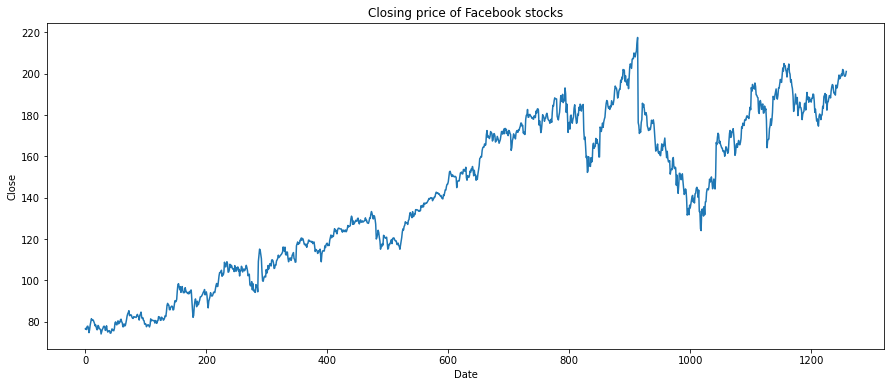

In [4]:
df["Close"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Closing price of Facebook stocks")
plt.show()

In [5]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

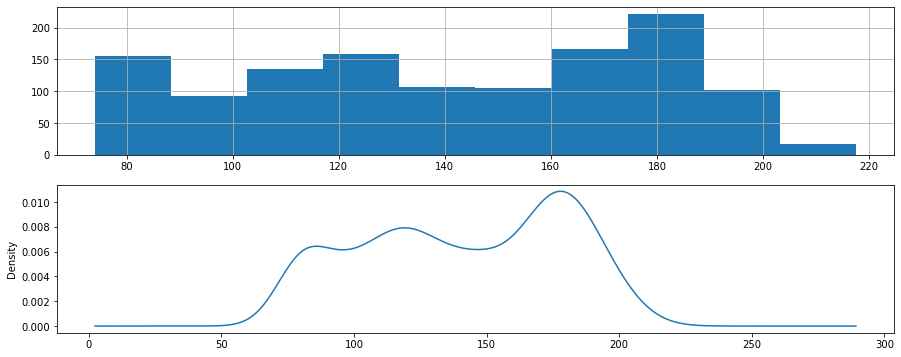

In [6]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

In [7]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [8]:
Augmented_Dickey_Fuller_Test_func(df['Close' ],'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


In [9]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [10]:

stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5926.792, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5930.825, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5930.810, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5928.648, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5928.521, Time=1.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5930.139, Time=1.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5932.491, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5932.541, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.62 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5927.184, Time=0.33 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.212 seconds


In [11]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1229
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2959.396
Date:                Tue, 13 Apr 2021   AIC                           5926.792
Time:                        01:15:30   BIC                           5947.245
Sample:                             0   HQIC                          5934.488
                               - 1229                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0122      0.012      1.046      0.296      -0.011       0.035
ar.L1          0.8631      0.087      9.909      0.000       0.692       1.034
ma.L1         -0.8999      0.076    -11.854      0.000      -1.049      -0.751
sigma2         7.2569      0.083     87.805      0.000       7.095       7.419
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):            112080.96
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               4.99   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [13]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")

In [14]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 73.01185099062965
MSE is : 7.727919084720587
RMSE is : 8.544697243941979
MAPE is : 3.9182438314890065
R2 is : -2.9891100736367937



In [15]:
forecast["new_index"] = range(1229, 1259)
forecast = forecast.set_index("new_index")

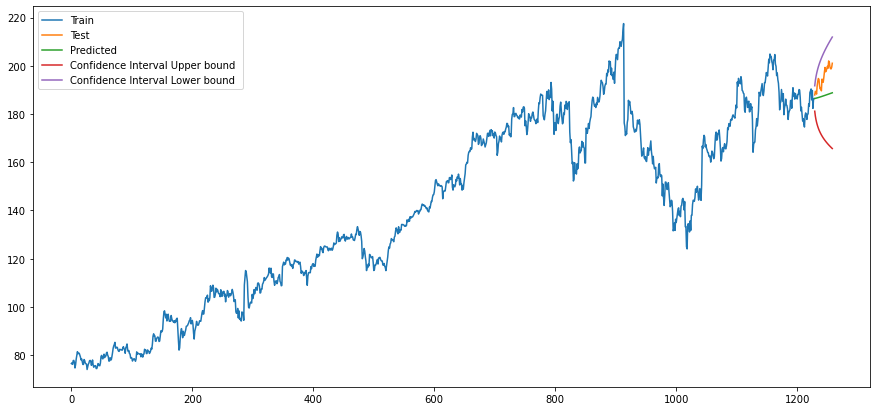

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

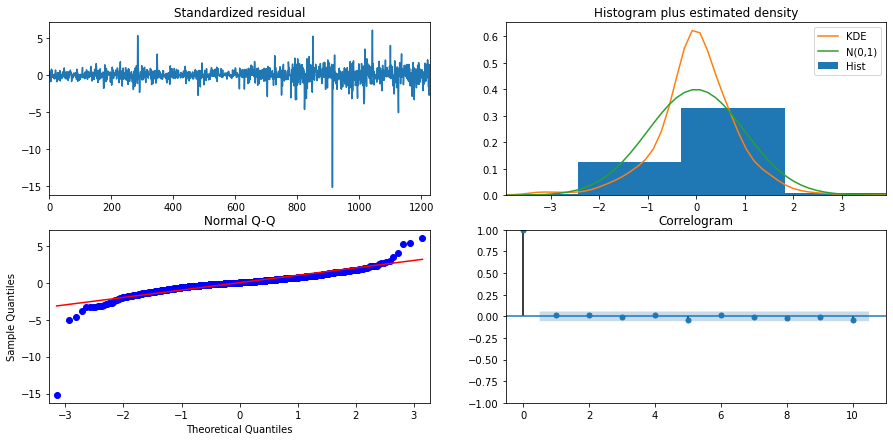

In [17]:
stepwise_model.plot_diagnostics();

# SARIMA

 Fitting SARIMA for Seasonal value m = 1
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5926.792, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5929.302, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5930.825, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5930.810, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5928.648, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5928.521, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5930.139, Time=1.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5932.491, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5932.541, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5927.184, Time=0.48 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.544 seconds
Model summary for  m = 1
---------------------------------------------------------------------------------------------

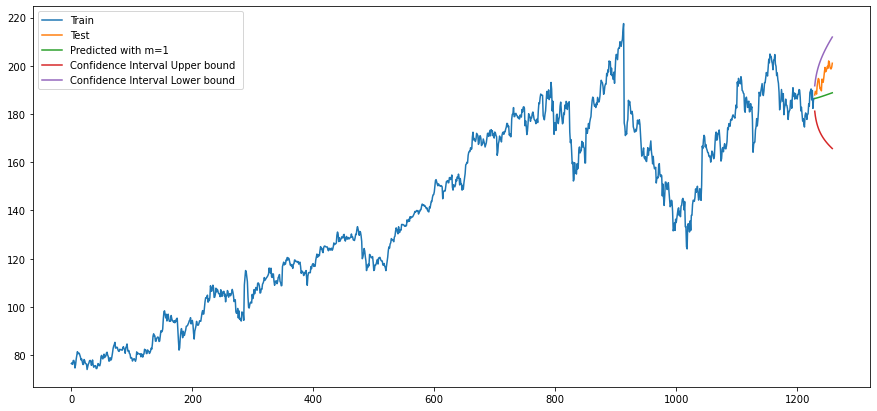

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


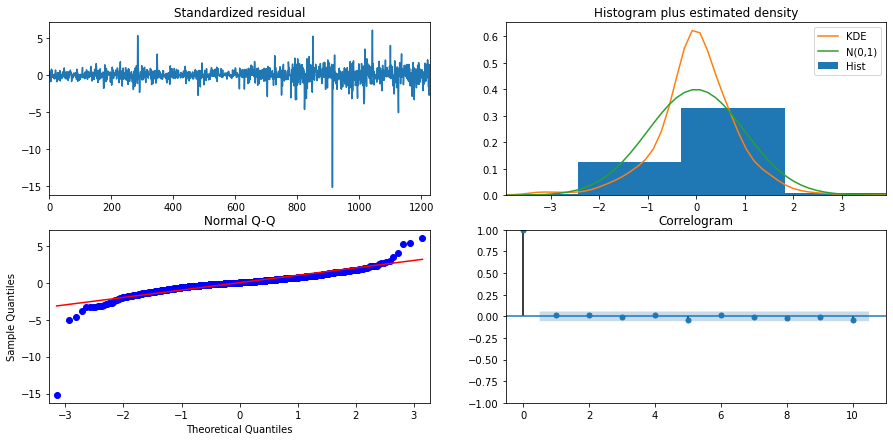

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 4
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=5930.606, Time=1.98 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=5929.302, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=5932.751, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=5932.728, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=5928.648, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=5931.257, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=5931.254, Time=0.16 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=5932.982, Time=1.37 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=5930.825, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=5930.810, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=5926.792, Time=1.04 sec
 ARIMA(1,1,1)(1,0,0)[4] intercept   : AIC=5928.543, Time=1.64 sec
 ARIMA(1,1,1)(0,0,1)[4]

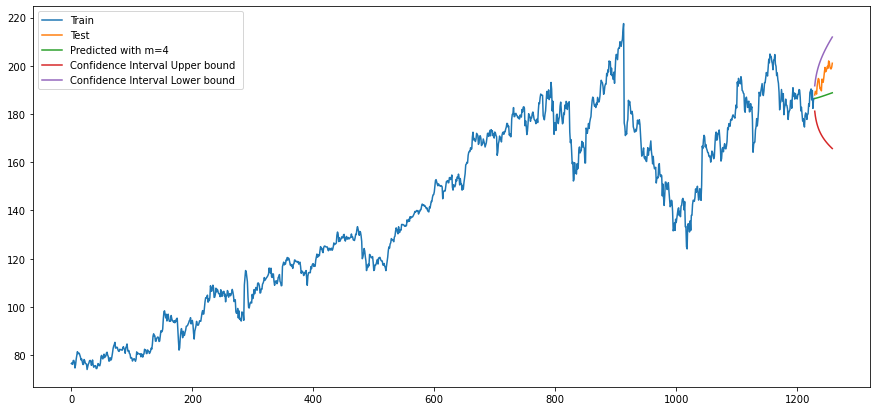

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


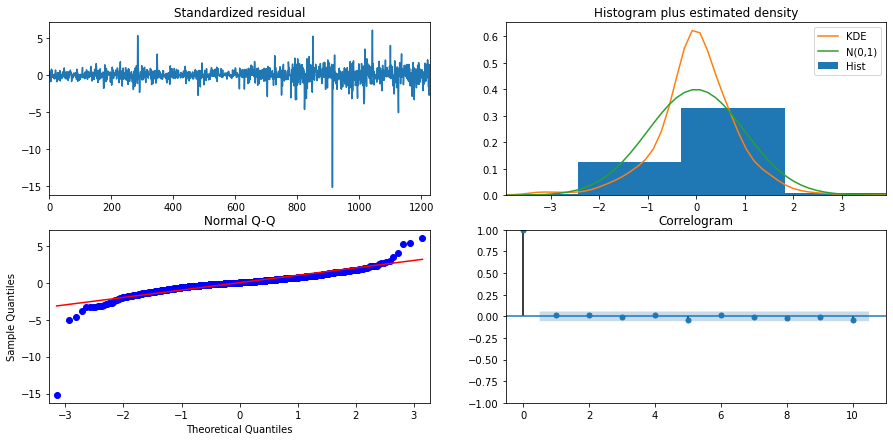

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 7
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=5926.233, Time=4.15 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5929.302, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5931.993, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5931.949, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5928.648, Time=0.08 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=5928.579, Time=2.37 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=5928.583, Time=2.14 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=5930.635, Time=6.76 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=5931.964, Time=10.48 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=5926.792, Time=0.96 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=5930.503, Time=6.33 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=5930.509, Time=3.68 sec
 ARIMA(1,1,1)(2,0,2)[7

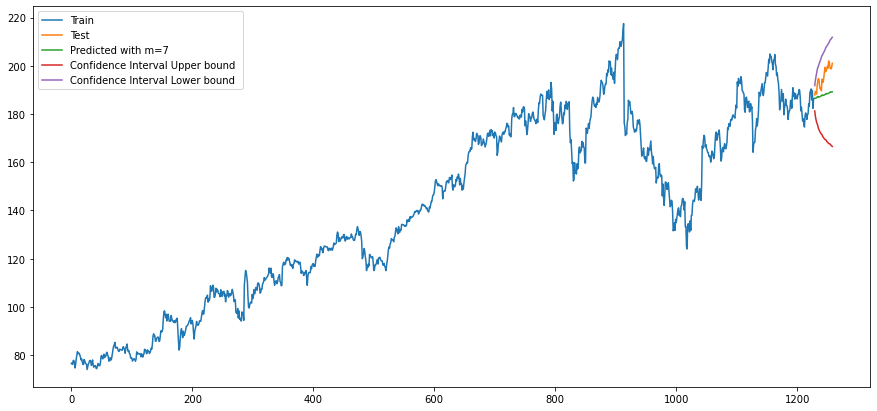

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 7


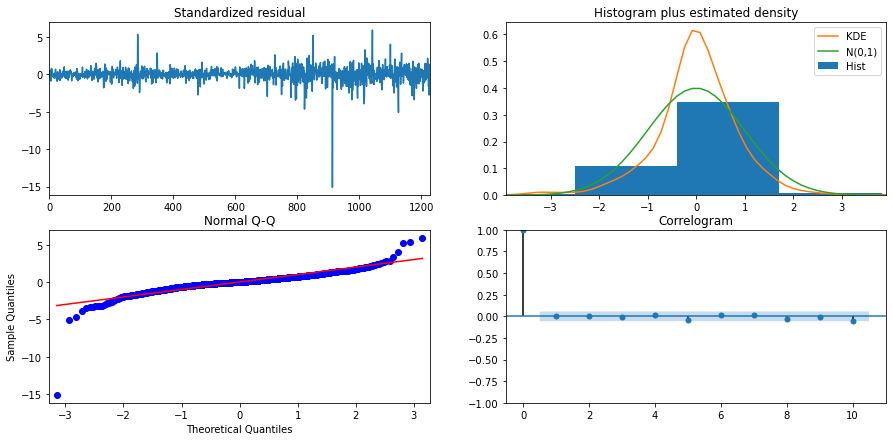

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 12
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=5930.743, Time=3.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5929.302, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5932.613, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5932.598, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5928.648, Time=0.06 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5931.080, Time=0.53 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5931.082, Time=0.39 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5933.079, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5930.825, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5930.810, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5926.792, Time=1.15 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=5928.744, Time=2.78 sec
 ARIMA(1,1

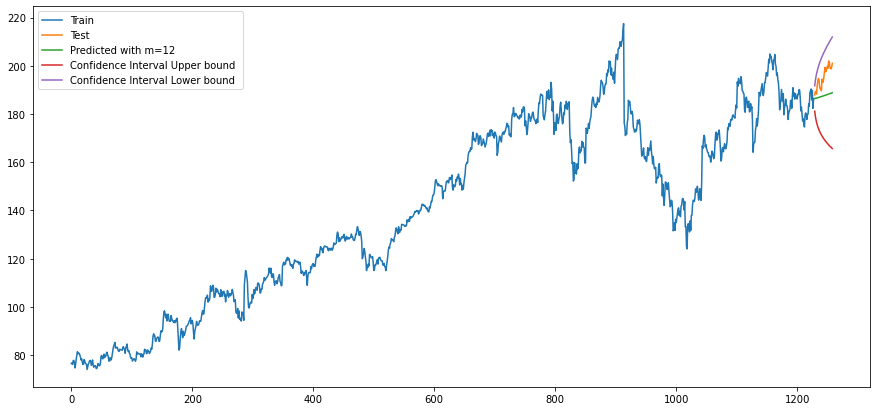

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


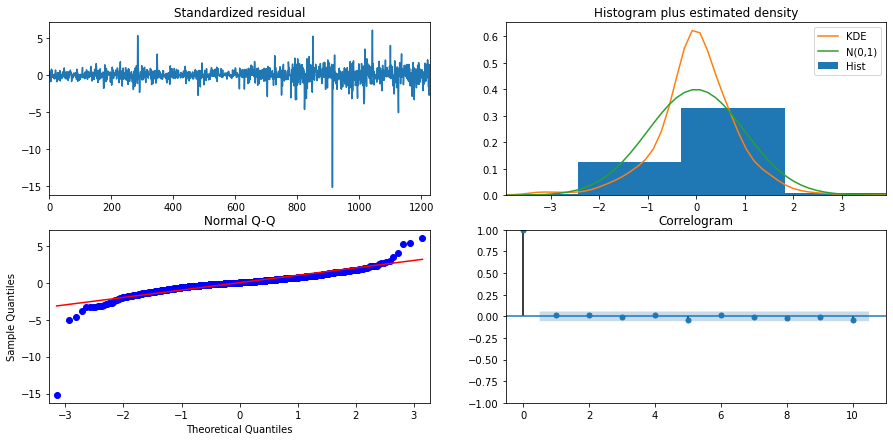

----------------------------------------------------------------------------------------------------
 Fitting SARIMA for Seasonal value m = 52
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=62.84 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=5929.302, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=5932.550, Time=5.75 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=5932.556, Time=5.86 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=5928.648, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[52] intercept   : AIC=5930.993, Time=3.86 sec
 ARIMA(0,1,0)(0,0,1)[52] intercept   : AIC=5931.017, Time=4.03 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=inf, Time=13.84 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=5930.825, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=5930.810, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=5926.792, Time=0.74 sec
 ARIMA(1,1,1)(1,0,0)[52] intercept   : AIC=5928.481, Time=21.50 sec
 ARIMA(1,1,1)(0,0

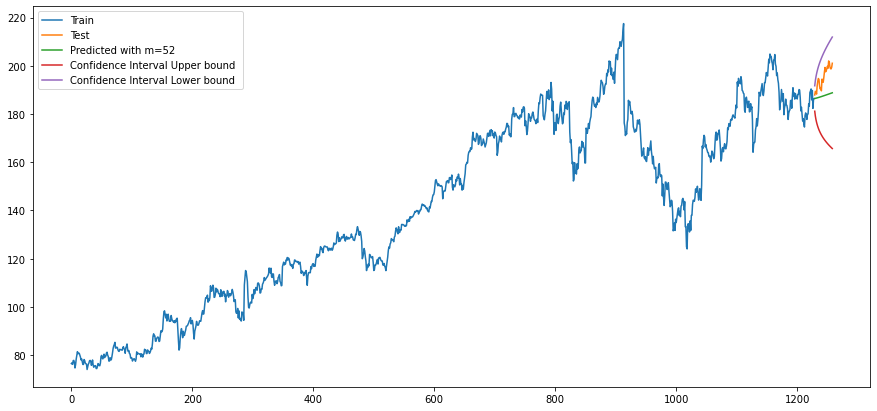

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 52


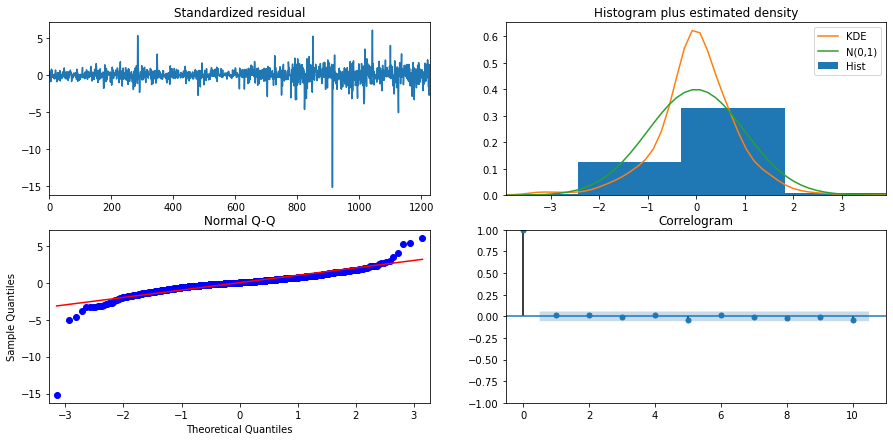

----------------------------------------------------------------------------------------------------


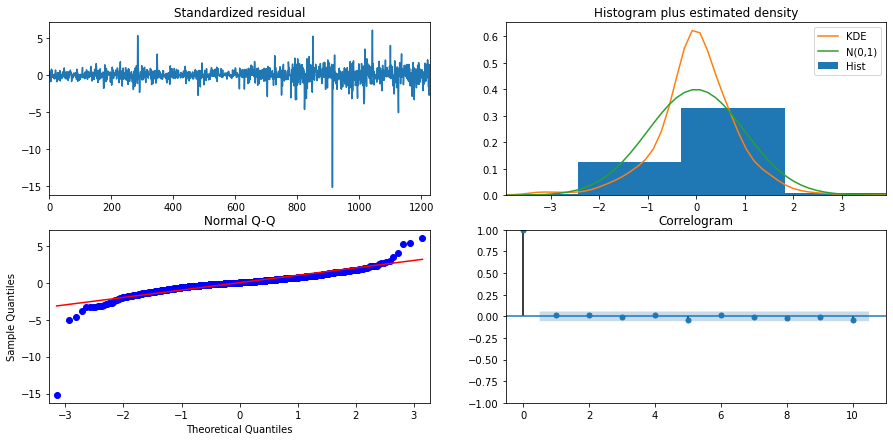

In [18]:
for m in  [1, 4,7,12,52]:
    print("="*100)
    print(f' Fitting SARIMA for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(train, start_p=1, start_q=1,
                                max_p=7, max_q=7, seasonal=True, start_P=1, start_Q=1, max_P=7, max_D=7, max_Q=7, m=m,
                                d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast ,conf_int= stepwise_model.predict(n_periods=30,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(test, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(train, label='Train ')
    plt.plot(test, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    
    print("-"*100)